In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


# Exploratory Data Analysis:

In [3]:
#Q1)How many rows and columns are there in the dataset?

In [4]:
df.shape #There are 181458 rows and 17 columns in the DataSet.

(181458, 17)

In [5]:
#Q2)What are the data types of each variable in the dataset (e.g., integer, float, string/object, datetime)?

In [6]:
print(df.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [7]:
#Q3)Are there any variables with unexpected or incorrect data types?

In [8]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [9]:
#Q4)How many numeric variables are there in the dataset?

In [10]:
numeric_cols = df.select_dtypes(include=['number'])
num_numeric_vars = numeric_cols.shape[1]
numeric_col_names = numeric_cols.columns.tolist()

print(f'The number of numeric variables in the dataset is: {num_numeric_vars}')
print('The numeric variables are:')
for col in numeric_col_names:
    print(col)


The number of numeric variables in the dataset is: 7
The numeric variables are:
Postal Code
Model Year
Electric Range
Base MSRP
Legislative District
DOL Vehicle ID
2020 Census Tract


In [11]:
#5)How many categorical variables are there in the dataset?

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category'])
num_categorical_vars = categorical_cols.shape[1]
categorical_col_names = categorical_cols.columns.tolist()

print(f'The number of categorical variables in the dataset is: {num_categorical_vars}')
print('The categorical variables are:')
for col in categorical_col_names:
    print(col)


The number of categorical variables in the dataset is: 10
The categorical variables are:
VIN (1-10)
County
City
State
Make
Model
Electric Vehicle Type
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Vehicle Location
Electric Utility


In [13]:
#6)Are there any datetime variables in the dataset?

In [14]:
df1 = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'value': [1, 2, 3]
    }, dtype='datetime64[ns]')
print(df1.dtypes)

date     datetime64[ns]
value    datetime64[ns]
dtype: object


In [15]:
#Q7)Are there any boolean variables (True/False) in the dataset?

In [16]:
boolean_cols = df.select_dtypes(include=['bool'])
num_boolean_vars = boolean_cols.shape[1]
boolean_col_names = boolean_cols.columns.tolist()

if num_boolean_vars > 0:
    print(f'The number of boolean variables in the dataset is: {num_boolean_vars}')
    print('The boolean variables are:')
    for col in boolean_col_names:
        print(col)
else:
    print('There are no boolean variables in the dataset.')


There are no boolean variables in the dataset.


In [17]:
#B)Missing values: Which columns have missing values? How many missing values are there in each column?

In [18]:
print("Columns with missing values:")
print(df.isnull().sum())

Columns with missing values:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dt

In [19]:
#C)Duplicates: Are there any duplicate records in the dataset? If so, how many?

In [20]:
duplicates = df.duplicated().sum()
print("Number of duplicate records:",duplicates)

Number of duplicate records: 0


In [21]:
#D)Unique Values in Categorical Columns: For categorical columns like 'County', 'City', 'State', 'Make', 'Model', 'Electric 
#Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Utility', how many unique values are there in each 
#column?

In [22]:
categorical_columns = ['County','City','State','Make','Model','Electric Vehicle Type',
                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']
for columns in categorical_columns:
    print(f"Unique values in {columns}:")

Unique values in County:
Unique values in City:
Unique values in State:
Unique values in Make:
Unique values in Model:
Unique values in Electric Vehicle Type:
Unique values in Clean Alternative Fuel Vehicle (CAFV) Eligibility:
Unique values in Electric Utility:


In [23]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [24]:
df[columns].value_counts()

PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               67180
PUGET SOUND ENERGY INC                                                                      36705
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                32012
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                            10420
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              7959
                                                                                            ...  
CITY OF SEATTLE - (WA)                                                                          1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                        1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY|PUD NO 1 OF JEFFERSON COUNTY        1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY        1
BONNEVILLE POWER ADM

In [25]:
unique_values = {}

for column in categorical_columns:
    unique_values[column] = df[column].value_counts()

unique_values_df = pd.DataFrame(unique_values)

print(unique_values_df)

          County  City  State  Make  Model  Electric Vehicle Type  \
330E         NaN   NaN    NaN   NaN  460.0                    NaN   
500          NaN   NaN    NaN   NaN  783.0                    NaN   
530E         NaN   NaN    NaN   NaN  406.0                    NaN   
740E         NaN   NaN    NaN   NaN   32.0                    NaN   
745E         NaN   NaN    NaN   NaN   10.0                    NaN   
...          ...   ...    ...   ...    ...                    ...   
Yolo         1.0   NaN    NaN   NaN    NaN                    NaN   
York         1.0   NaN    NaN   NaN    NaN                    NaN   
Yorktown     NaN   1.0    NaN   NaN    NaN                    NaN   
Yuba         1.0   NaN    NaN   NaN    NaN                    NaN   
Zillah       NaN  35.0    NaN   NaN    NaN                    NaN   

          Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Utility  
330E                                                    NaN               NaN  
500        

In [26]:
#E)Count of Unique Values in Categorical Columns: What is the count of each unique value in categorical columns like 
#'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility', 
#'Electric Utility'?

In [27]:
categorical_columns = ['County','City','State','Make','Model','Electric Vehicle Type',
                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].value_counts())
    print()

Unique values in County:
King          94460
Snohomish     21439
Pierce        14043
Clark         10675
Thurston       6600
              ...  
Carroll           1
Suffolk           1
Miami-Dade        1
Sarasota          1
Pima              1
Name: County, Length: 193, dtype: int64

Unique values in City:
Seattle        30045
Bellevue        9117
Redmond         6568
Vancouver       6329
Bothell         5961
               ...  
Champaign          1
Chevy Chase        1
Alderdale          1
Austin             1
Herndon            1
Name: City, Length: 726, dtype: int64

Unique values in State:
WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
IL        15
CO        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
SC         7
AL         7
CT         7
OR         6
GA         6
MO         5
NY         5
MA         4
ID         4
LA         4
OH         4
KY         3
UT         3
PA         3
DC         3
IN         3
WY         2
AR     

In [28]:
#F)Summary Statistics: 
#1. What are the summary statistics (mean, median, min, max, etc.) for numerical variables like 'Electric Range' and 'Base 
#MSRP'? 
#2. What are the summary statistics for categorical columns?

In [31]:
#1
print(df["Electric Range"].mean())
print(df["Electric Range"].median())
print(df["Electric Range"].min())
print(df["Electric Range"].max())

57.82666512360987
0.0
0
337


In [33]:
#1
print(df['Electric Range'].mean())
print(df['Electric Range'].median())
print(df['Electric Range'].min())
print(df['Electric Range'].max())

57.82666512360987
0.0
0
337


In [34]:
print(df['Base MSRP'].mean())
print(df['Base MSRP'].median())
print(df['Base MSRP'].min())
print(df['Base MSRP'].max())

1040.2367489997685
0.0
0
845000


# Univariate Analysis:

In [40]:
#Q1)What is the distribution of vehicle model years?

In [41]:
Modelyear =df["Model Year"].value_counts()
print(Modelyear)

2023    58393
2022    27922
2021    19034
2018    14291
2020    11851
2019    10922
2024     9799
2017     8591
2016     5524
2015     4821
2013     4375
2014     3502
2012     1603
2011      770
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: Model Year, dtype: int64


In [ ]:
#2Are there any noticeable trends or patterns in the distribution over time?

In [43]:
#Q3)How many unique car makes are there in the dataset?

In [37]:
unique_makes = df['Make'].nunique()
print(f"There are {unique_makes} unique car makes in the dataset.")

There are 40 unique car makes in the dataset.


In [44]:
#Q4)What are the most common car makes?

In [45]:
most_common_makes = df['Make'].value_counts().head(10)
print(most_common_makes)

TESLA         80819
NISSAN        14037
CHEVROLET     13864
FORD           9527
BMW            7680
KIA            7642
TOYOTA         6519
VOLKSWAGEN     5163
JEEP           4690
HYUNDAI        4561
Name: Make, dtype: int64


In [1]:
#Q5)How many different types of electric vehicles are represented in the dataset?

In [4]:
unique_ev_types = df['Electric Vehicle Type'].nunique()
print(f"There are {unique_ev_types} different types of electric vehicles in the dataset.")

There are 2 different types of electric vehicles in the dataset.


In [5]:
#Q6)What is the frequency of each electric vehicle type?

In [6]:
ev_type_counts = df['Electric Vehicle Type'].value_counts()
print(ev_type_counts)

Battery Electric Vehicle (BEV)            141973
Plug-in Hybrid Electric Vehicle (PHEV)     39485
Name: Electric Vehicle Type, dtype: int64


In [7]:
#Q7)What is the distribution of clean alternative fuel vehicle eligibility?

In [8]:
eligibility_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(eligibility_counts)

Eligibility unknown as battery range has not been researched    94730
Clean Alternative Fuel Vehicle Eligible                         66816
Not eligible due to low battery range                           19912
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64


In [9]:
#Q8)How many vehicles are eligible vs. not eligible?

In [10]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

Eligibility unknown as battery range has not been researched    94730
Clean Alternative Fuel Vehicle Eligible                         66816
Not eligible due to low battery range                           19912
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [11]:
#Q9)What is the range of electric ranges in the dataset?

In [16]:
electric_range_min = df['Electric Range'].min()
electric_range_max = df['Electric Range'].max()
print('The minimum electric range is:', electric_range_min)
print('The maximum electric range is:', electric_range_max)

The minimum electric range is: 0
The maximum electric range is: 337


In [17]:
#Q10)Are there any outliers in the electric range values?

<function matplotlib.pyplot.show(close=None, block=None)>

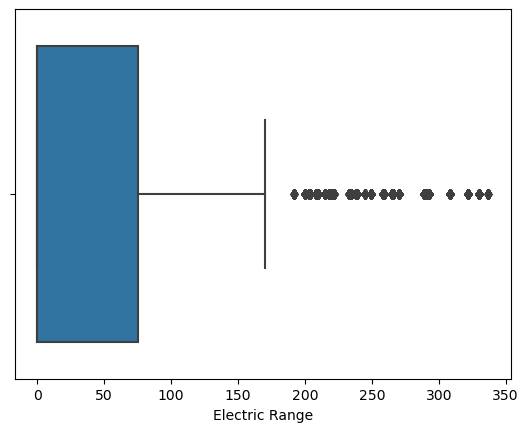

In [18]:
sns.boxplot(x = df["Electric Range"])
plt.show 

In [19]:
#Q11)What is the distribution of base MSRP (Manufacturer's Suggested Retail Price)?

<Axes: >

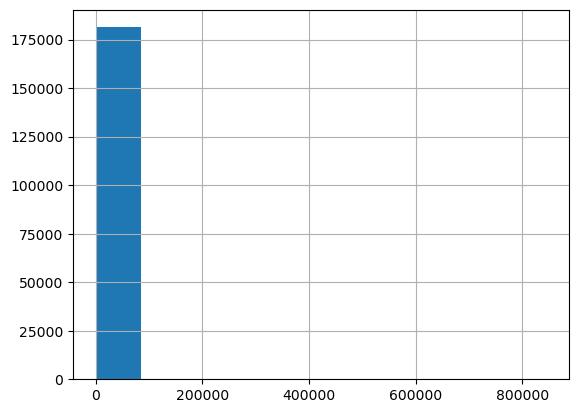

In [5]:
df["Base MSRP"].hist()

In [6]:
#Q12)Are there any high-priced or low-priced vehicles in the dataset?

In [7]:
#Q13)How many unique counties are represented in the dataset?

In [8]:
unique_counties = df['County'].nunique()
print(f"There are {unique_counties} unique counties in the dataset.")

There are 193 unique counties in the dataset.


In [9]:
#Q14)What is the frequency of each county?

In [10]:
county_frequency = df['County'].value_counts()
print(county_frequency)

King          94460
Snohomish     21439
Pierce        14043
Clark         10675
Thurston       6600
              ...  
Carroll           1
Suffolk           1
Miami-Dade        1
Sarasota          1
Pima              1
Name: County, Length: 193, dtype: int64


In [11]:
#Q15)How many unique cities are represented in the dataset?

In [12]:
unique_city= df['City'].nunique()
print(f"There are {unique_city} unique city in the dataset.")

There are 726 unique city in the dataset.


In [13]:
#Q16)What is the frequency of each city?

In [14]:
city_freq = df['City'].value_counts()
print(city_freq)

Seattle        30045
Bellevue        9117
Redmond         6568
Vancouver       6329
Bothell         5961
               ...  
Champaign          1
Chevy Chase        1
Alderdale          1
Austin             1
Herndon            1
Name: City, Length: 726, dtype: int64


In [15]:
#Q17)What is the distribution of states in the dataset?

In [16]:
df["State"].value_counts()

WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
IL        15
CO        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
SC         7
AL         7
CT         7
OR         6
GA         6
MO         5
NY         5
MA         4
ID         4
LA         4
OH         4
KY         3
UT         3
PA         3
DC         3
IN         3
WY         2
AR         2
NE         2
KS         2
MI         2
BC         2
RI         2
AK         1
IA         1
MN         1
OK         1
NH         1
AE         1
NM         1
DE         1
Name: State, dtype: int64

In [17]:
#Q18)Are there any states that are overrepresented or underrepresented?

In [18]:
state_percentage = df['State'].value_counts(normalize=True) * 100
state_percentage

WA    99.780665
CA     0.056211
VA     0.025901
MD     0.017635
TX     0.014328
NC     0.009369
IL     0.008266
CO     0.008266
AZ     0.006613
FL     0.005511
HI     0.004960
NV     0.004960
NJ     0.004409
SC     0.003858
AL     0.003858
CT     0.003858
OR     0.003307
GA     0.003307
MO     0.002755
NY     0.002755
MA     0.002204
ID     0.002204
LA     0.002204
OH     0.002204
KY     0.001653
UT     0.001653
PA     0.001653
DC     0.001653
IN     0.001653
WY     0.001102
AR     0.001102
NE     0.001102
KS     0.001102
MI     0.001102
BC     0.001102
RI     0.001102
AK     0.000551
IA     0.000551
MN     0.000551
OK     0.000551
NH     0.000551
AE     0.000551
NM     0.000551
DE     0.000551
Name: State, dtype: float64

In [19]:
#Q19)What is the range of postal codes in the dataset?

In [20]:
min_postal_code = df['Postal Code'].min()
max_postal_code = df['Postal Code'].max()
print("The range of postal codes in the dataset is from", min_postal_code, "to", max_postal_code)

The range of postal codes in the dataset is from 1545.0 to 99577.0


In [21]:
#Q20)Are there any patterns or clusters in the postal code distribution?

# Bivariate Analysis

In [22]:
#1.Is there a relationship between electric range and base MSRP?
correlation_coefficient = df['Electric Range'].corr(df['Base MSRP'])
print("The correlation coefficient between electric range and base MSRP is:", correlation_coefficient) 

The correlation coefficient between electric range and base MSRP is: 0.10827653518662737


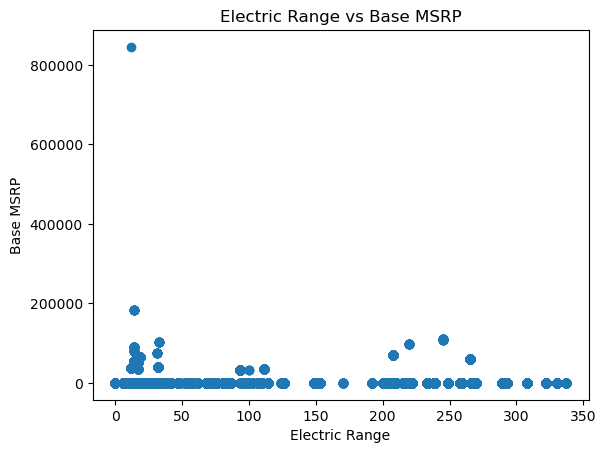

In [23]:
#2. Can we identify any patterns in the pricing based on the electric range?
plt.scatter(df['Electric Range'], df['Base MSRP'])
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('Electric Range vs Base MSRP')
plt.show()

In [24]:
correlation_coefficient = df['Electric Range'].corr(df['Base MSRP'])
print("The correlation coefficient between electric range and base MSRP is:", correlation_coefficient)

The correlation coefficient between electric range and base MSRP is: 0.10827653518662737


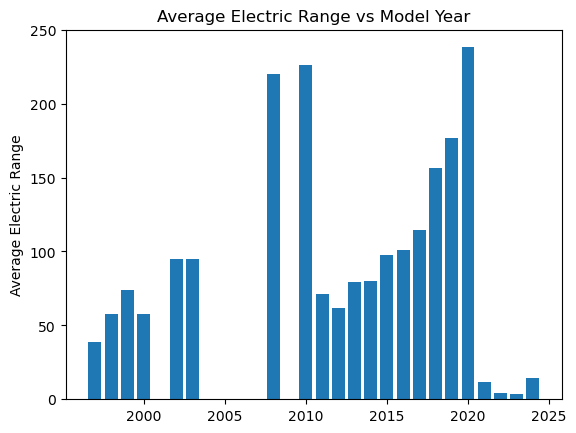

In [25]:
#3. How does the electric range vary across different model years?
avg_range_by_year = df.groupby('Model Year')['Electric Range'].mean()
plt.bar(avg_range_by_year.index, avg_range_by_year.values)
plt.xlabel('')
plt.ylabel('Average Electric Range')
plt.title('Average Electric Range vs Model Year')
plt.show()

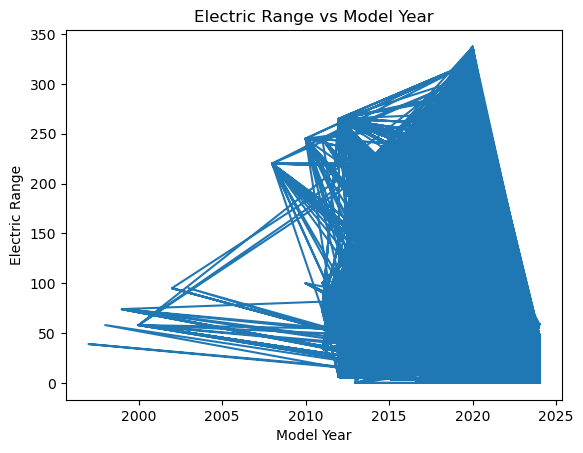

The correlation coefficient between electric range and model year is: -0.4815410711173875


In [26]:
#4 Are newer models associated with longer electric ranges
plt.plot(df['Model Year'], df['Electric Range'])
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('Electric Range vs Model Year')
plt.show()

# Calculate the correlation coefficient between electric range and model year
correlation_coefficient = df['Electric Range'].corr(df['Model Year'])
print("The correlation coefficient between electric range and model year is:", correlation_coefficient)

In [27]:
#5. Do different car makes have significantly different electric ranges?

In [28]:
#6
# Calculate the average electric range for each car make
average_range_by_make = df.groupby('Make')['Electric Range'].mean()

# Sort the car makes based on their average electric range
df2 = average_range_by_make.sort_values(ascending=False)

# Print the car make with the longest electric range
print(df2.index[0])

JAGUAR


In [29]:
#7. Is there a difference in base MSRP between different types of electric vehicles?
# Calculate the average base MSRP for each vehicle type
avg_msrp_by_type = df.groupby('Electric Vehicle Type')['Base MSRP'].mean()

# Check if there is a difference in base MSRP between different types of electric vehicles
if len(avg_msrp_by_type) > 1:
    print("There is a difference in base MSRP between different types of electric vehicles.")
else:
    print("There is no difference in base MSRP between different types of electric vehicles.")

There is a difference in base MSRP between different types of electric vehicles.


In [30]:
#8. Are battery electric vehicles (BEVs) typically more expensive than plug-in hybrid electric vehicles (PHEVs)?

In [31]:
#9. Are there any differences in electric range among vehicles from different counties?
# Calculate the average electric range for EVs from each country
avg_range_by_country = df.groupby('County')['Electric Range'].mean()

# Print the average electric range for each country
print(avg_range_by_country)

County
Ada             0.000000
Adams          55.403846
Alameda        65.500000
Albemarle     211.500000
Alexandria    217.333333
                 ...    
Worcester       0.000000
Yakima         60.648936
Yolo            0.000000
York            0.000000
Yuba            0.000000
Name: Electric Range, Length: 193, dtype: float64


In [32]:
#10 Do vehicles from urban areas tend to have longer electric ranges compared to rural areas?

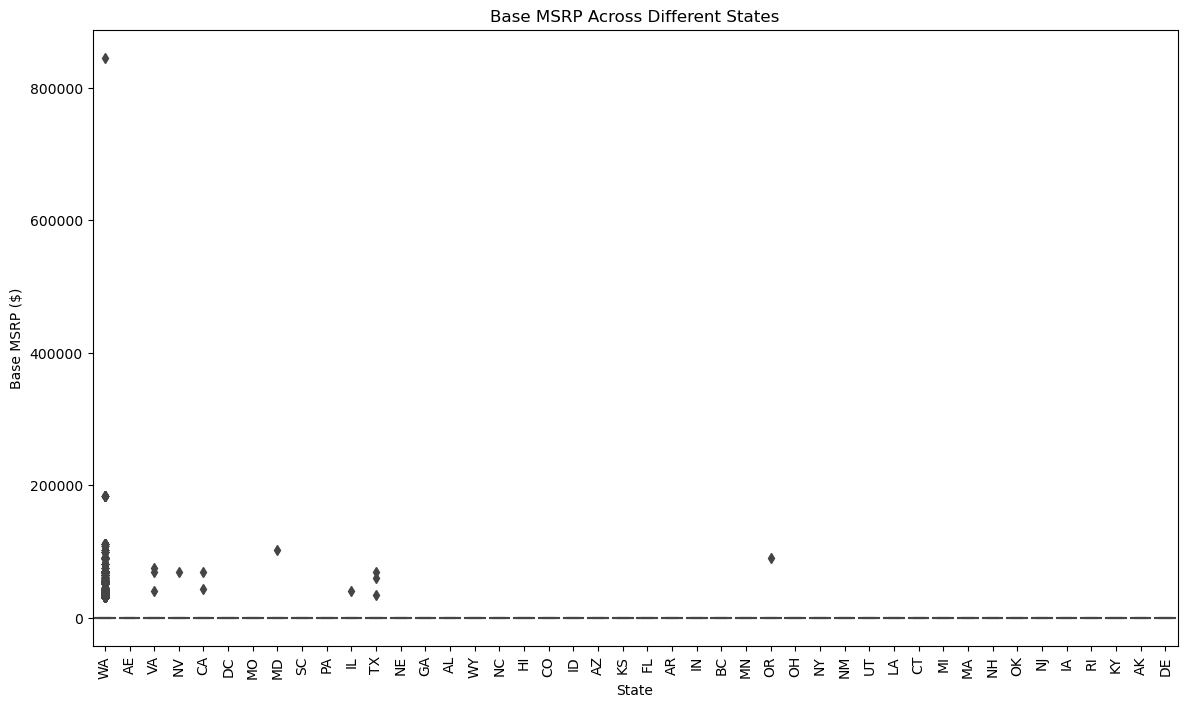

In [33]:
#11. How does base MSRP vary across different states?
# Box plot to show base MSRP across different states
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='State', y='Base MSRP')
plt.title('Base MSRP Across Different States')
plt.xlabel('State')
plt.ylabel('Base MSRP ($)')
plt.xticks(rotation=90)
plt.show()

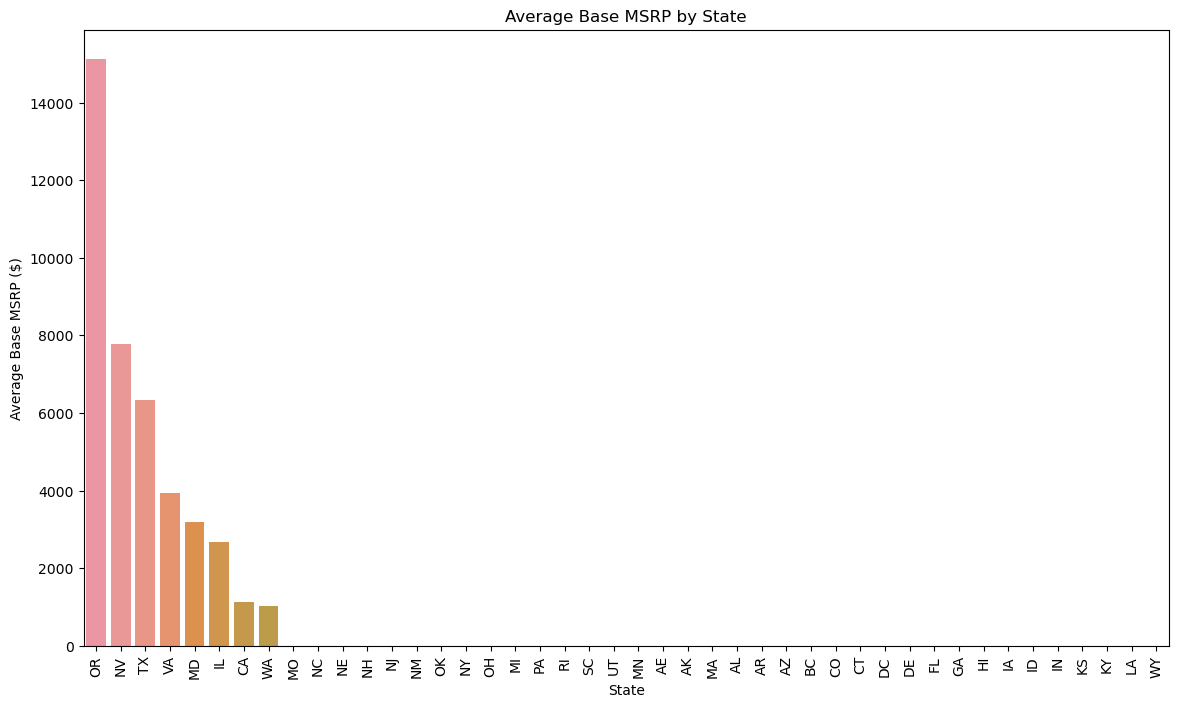

In [34]:
#12. Are there any states where electric vehicles are generally more expensive?
plt.figure(figsize=(14, 8))
mean_msrp = df.groupby('State')['Base MSRP'].mean().sort_values(ascending=False)
sns.barplot(x=mean_msrp.index, y=mean_msrp.values)
plt.title('Average Base MSRP by State')
plt.xlabel('State')
plt.ylabel('Average Base MSRP ($)')
plt.xticks(rotation=90)
plt.show()

In [35]:
mean_msrp = df.groupby('State')['Base MSRP'].mean().sort_values(ascending=False)
mean_msrp

State
OR    15116.666667
NV     7766.666667
TX     6338.269231
VA     3935.957447
MD     3187.500000
IL     2666.333333
CA     1117.647059
WA     1038.290622
MO        0.000000
NC        0.000000
NE        0.000000
NH        0.000000
NJ        0.000000
NM        0.000000
OK        0.000000
NY        0.000000
OH        0.000000
MI        0.000000
PA        0.000000
RI        0.000000
SC        0.000000
UT        0.000000
MN        0.000000
AE        0.000000
AK        0.000000
MA        0.000000
AL        0.000000
AR        0.000000
AZ        0.000000
BC        0.000000
CO        0.000000
CT        0.000000
DC        0.000000
DE        0.000000
FL        0.000000
GA        0.000000
HI        0.000000
IA        0.000000
ID        0.000000
IN        0.000000
KS        0.000000
KY        0.000000
LA        0.000000
WY        0.000000
Name: Base MSRP, dtype: float64

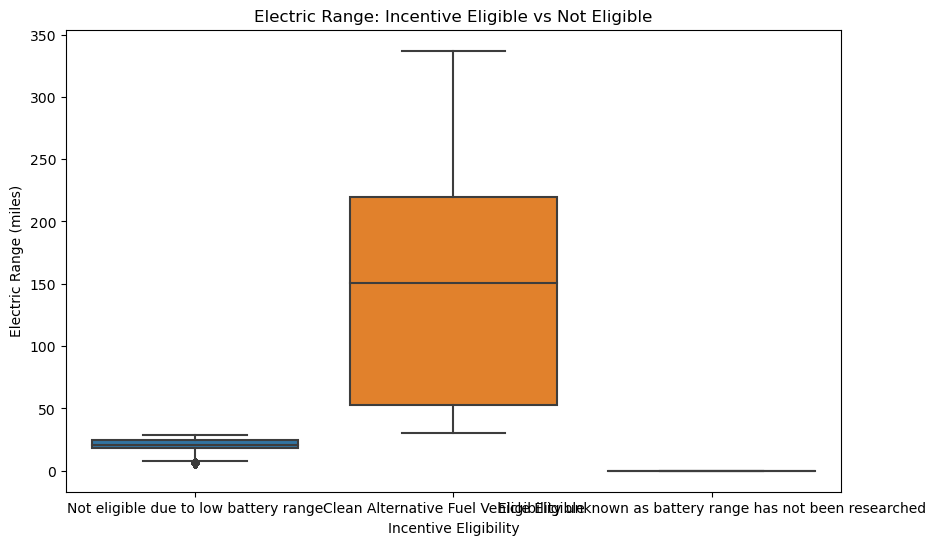

In [36]:
#13. Is there a difference in electric range between vehicles that are eligible for clean alternative fuel vehicle incentives
#and those that are not?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range') 
plt.title('Electric Range: Incentive Eligible vs Not Eligible')
plt.xlabel('Incentive Eligibility')
plt.ylabel('Electric Range (miles)')
plt.show()

In [37]:
#14. Do eligible vehicles tend to have longer electric ranges?
eligible_mean = df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].mean()
print(eligible_mean)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         151.037790
Eligibility unknown as battery range has not been researched      0.000000
Not eligible due to low battery range                            20.157192
Name: Electric Range, dtype: float64


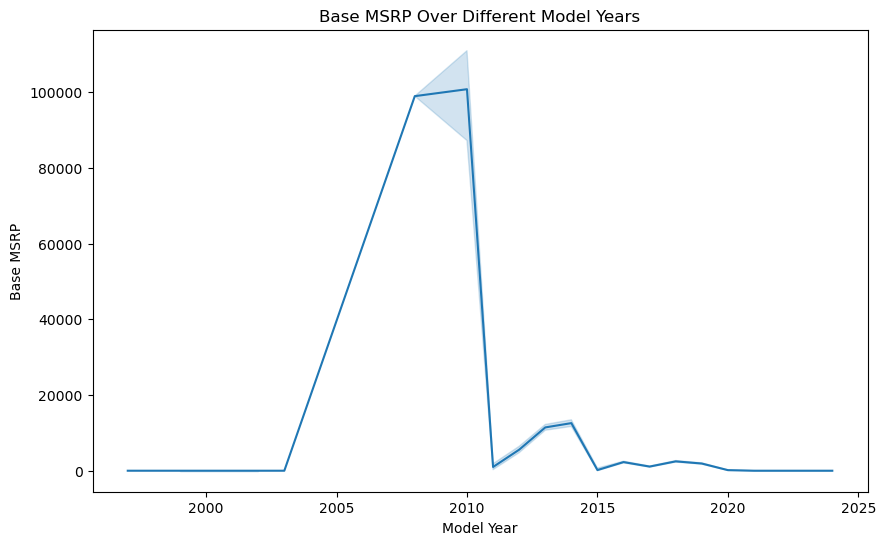

In [38]:
#15. How does base MSRP change over different model years?
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Model Year', y='Base MSRP')
plt.title('Base MSRP Over Different Model Years')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.show()

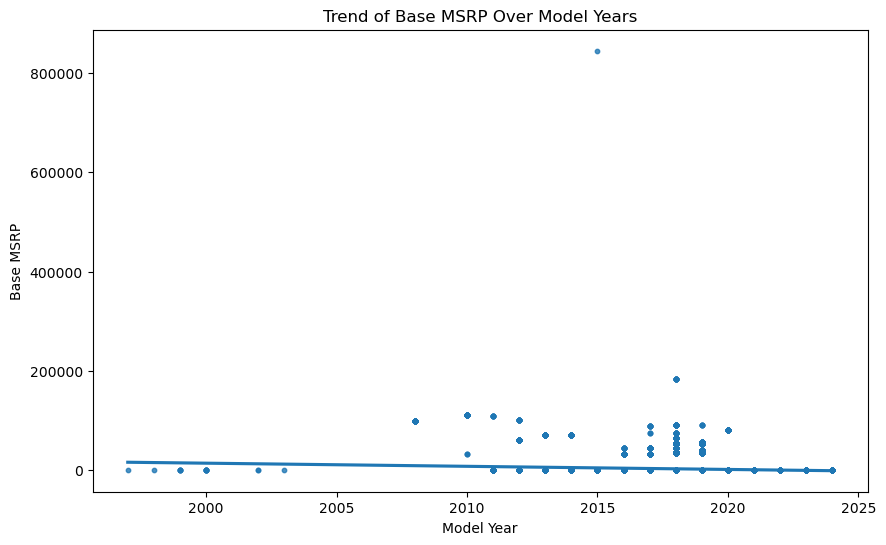

In [39]:
#16. Are newer models generally more expensive
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Model Year', y='Base MSRP', scatter_kws={'s':10})
plt.title('Trend of Base MSRP Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.show()

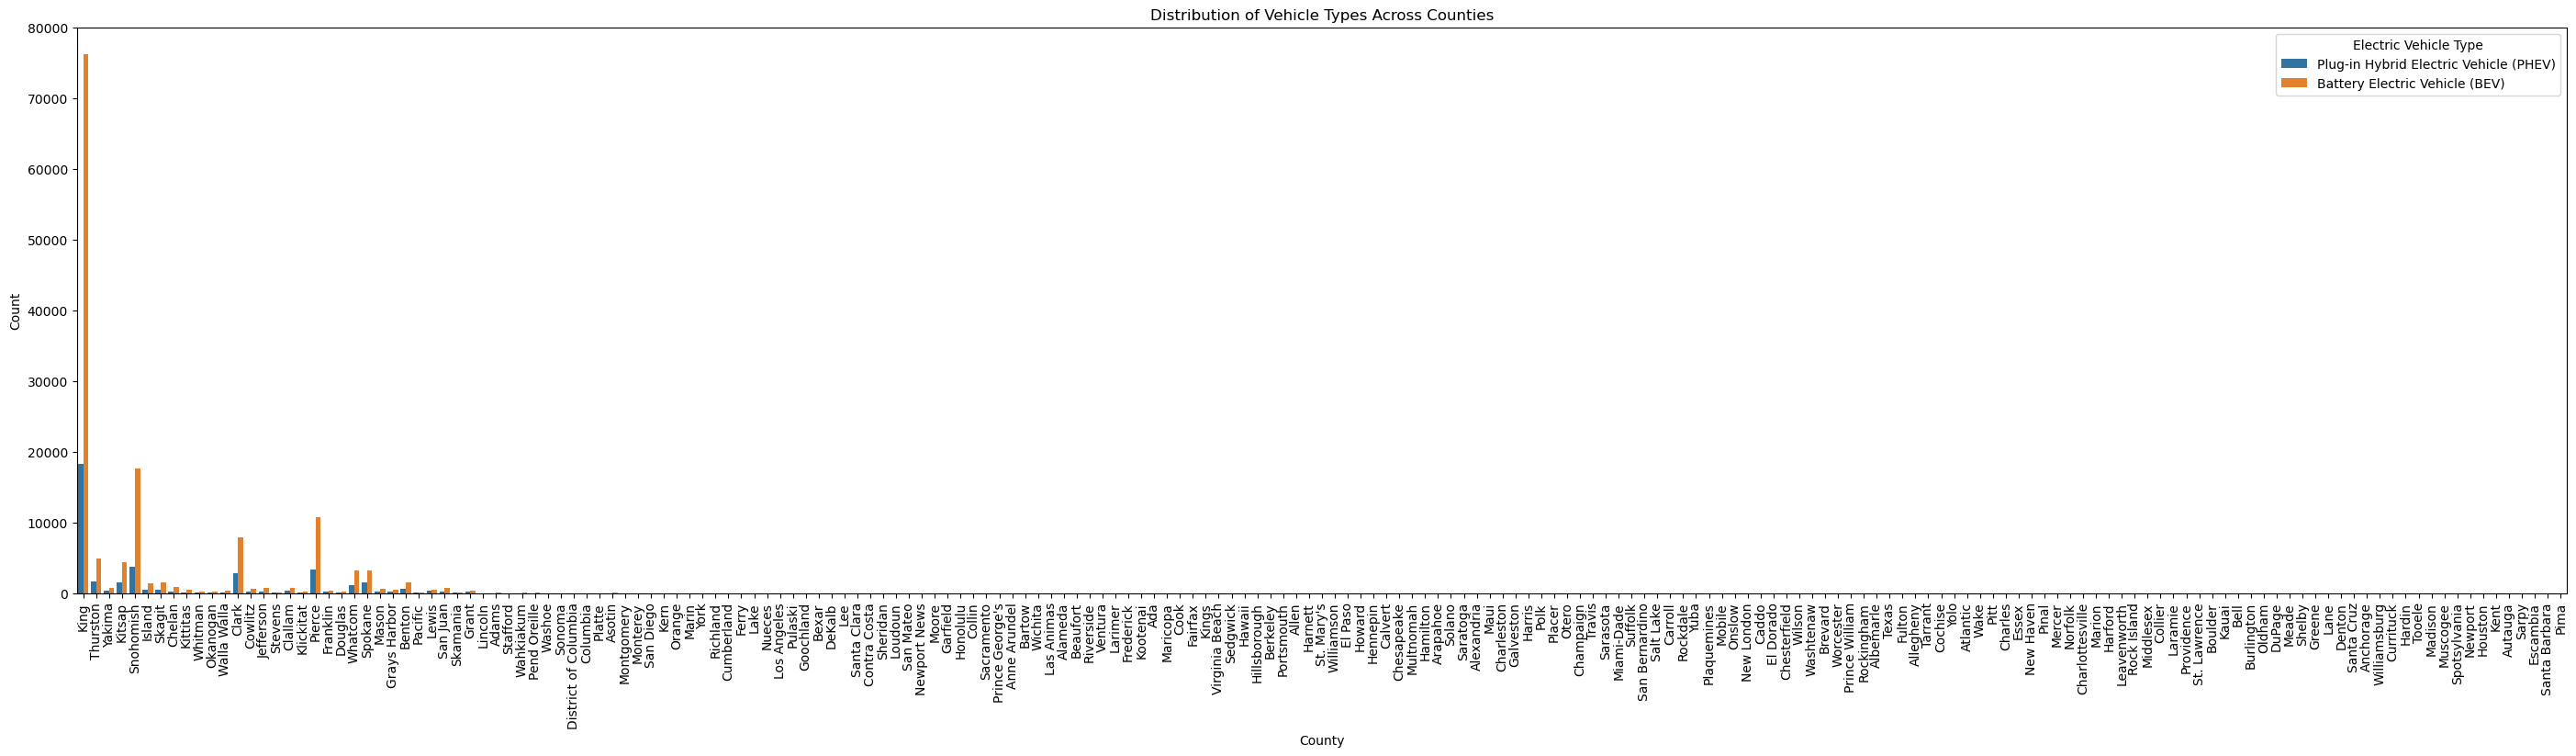

In [40]:
#17
plt.figure(figsize=(35, 8))
sns.countplot(data=df, x='County', hue='Electric Vehicle Type')
plt.title('Distribution of Vehicle Types Across Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

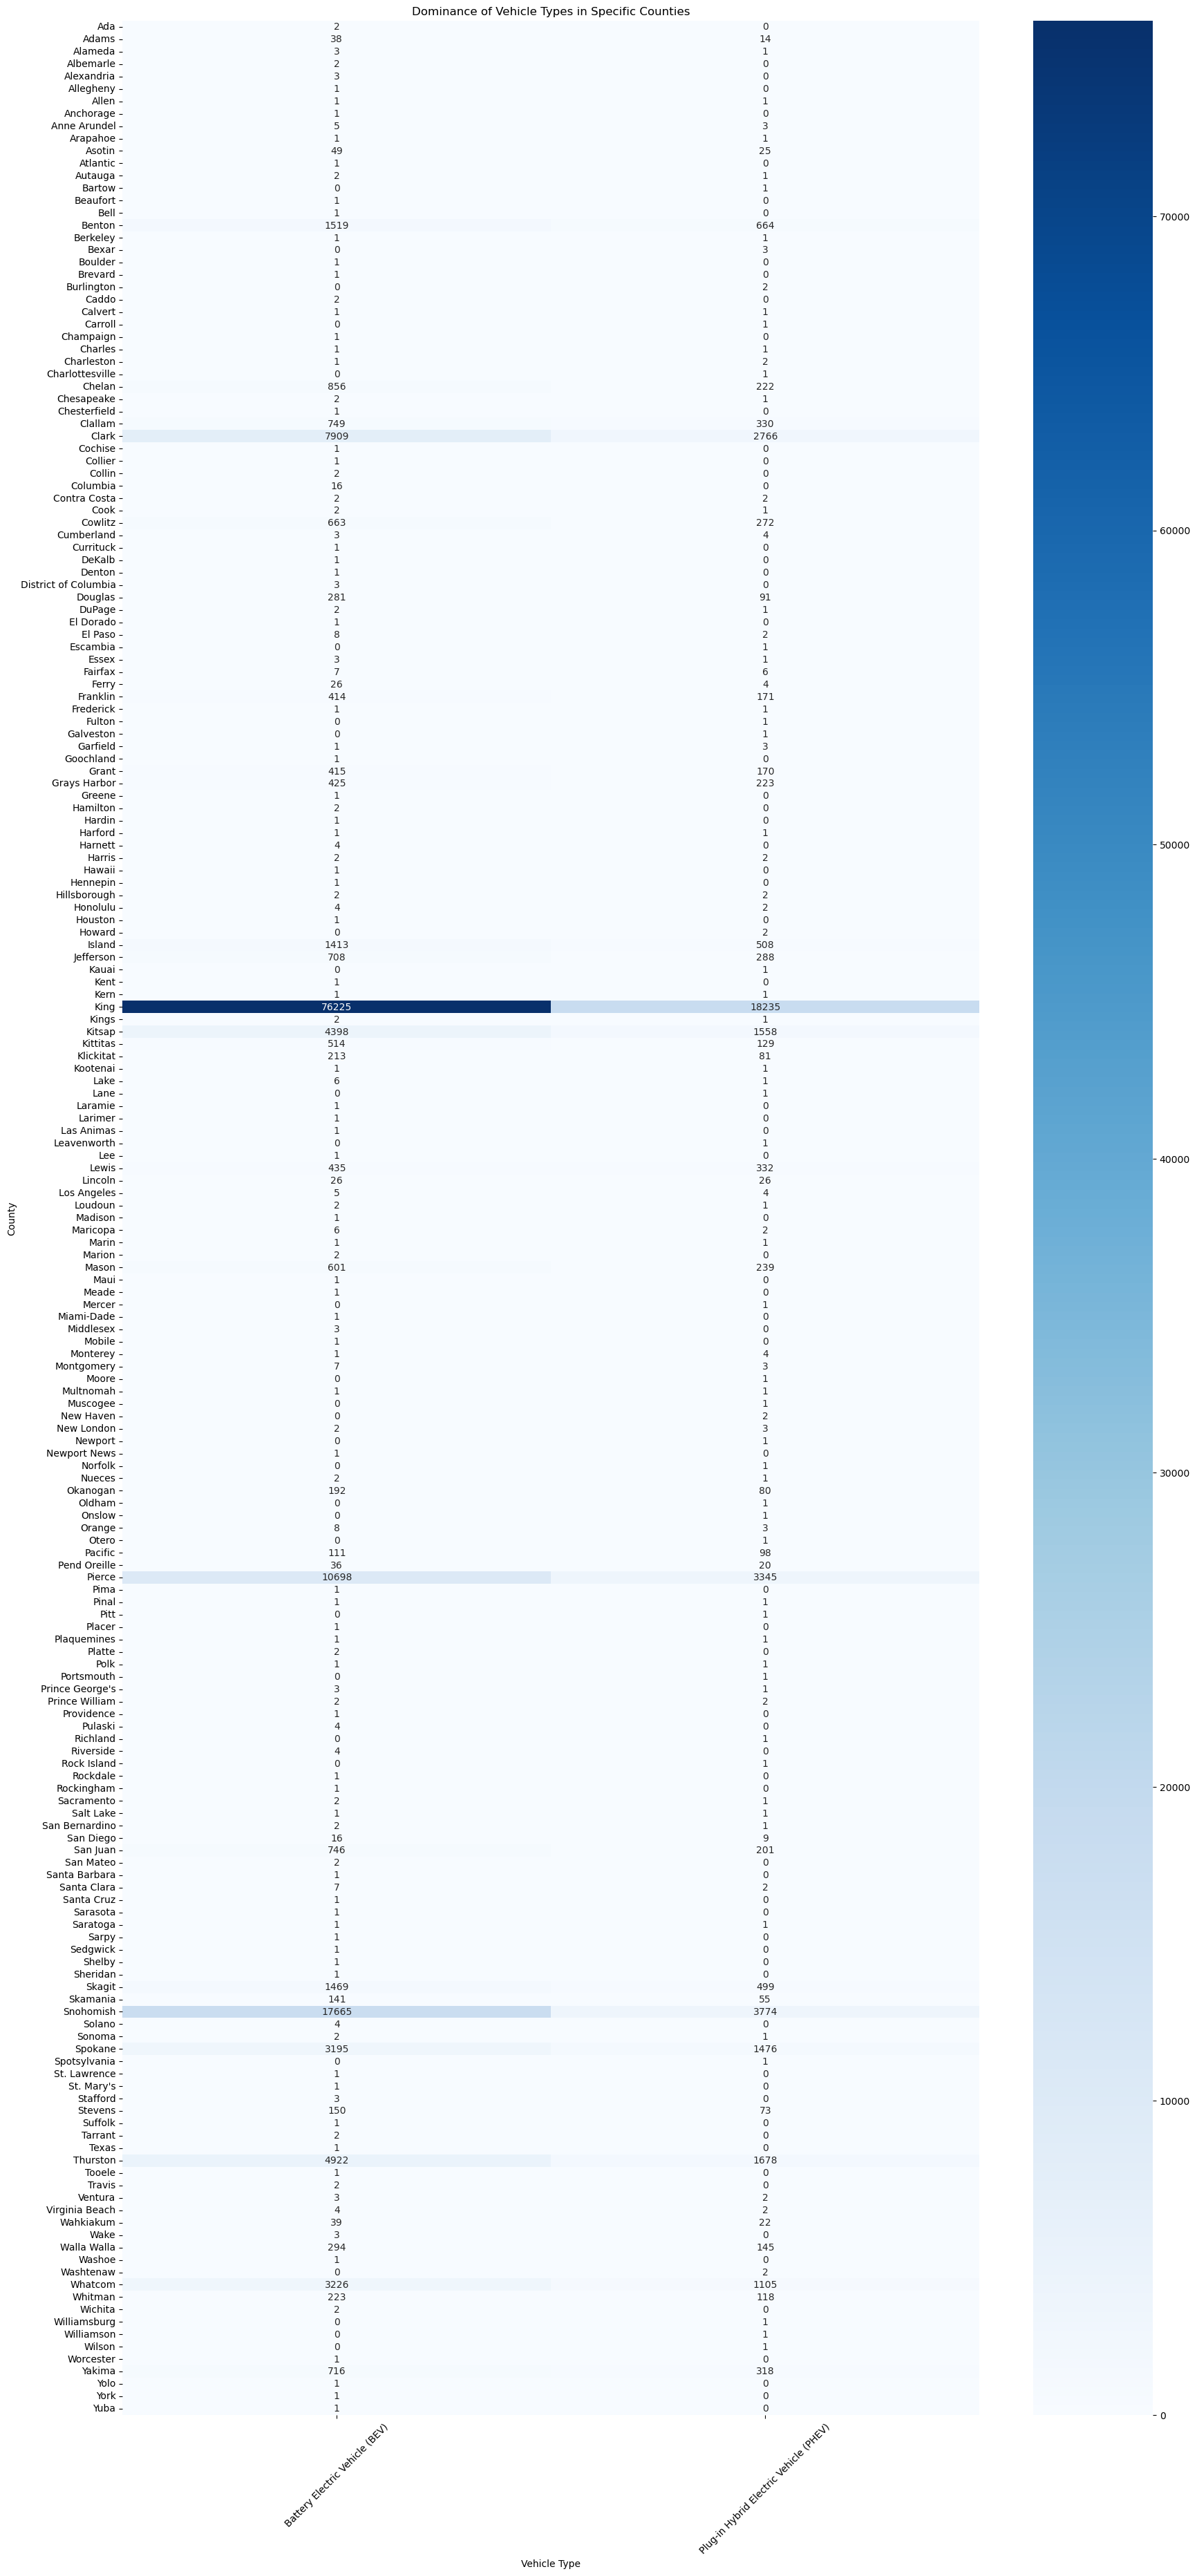

In [41]:
#18
vehicle_type_counts = pd.crosstab(df['County'], df['Electric Vehicle Type'])
plt.figure(figsize=(20, 45))
sns.heatmap(vehicle_type_counts, cmap='Blues', annot=True, fmt='d')
plt.title('Dominance of Vehicle Types in Specific Counties')
plt.xlabel('Vehicle Type')
plt.ylabel('County')
plt.xticks(rotation=45)
plt.show()

In [42]:
vehicle_type_counts = pd.crosstab(df['County'], df['Electric Vehicle Type'])
vehicle_type_counts

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
County,,
Ada,2,0
Adams,38,14
Alameda,3,1
Albemarle,2,0
Alexandria,3,0
...,...,...
Worcester,1,0
Yakima,716,318
Yolo,1,0


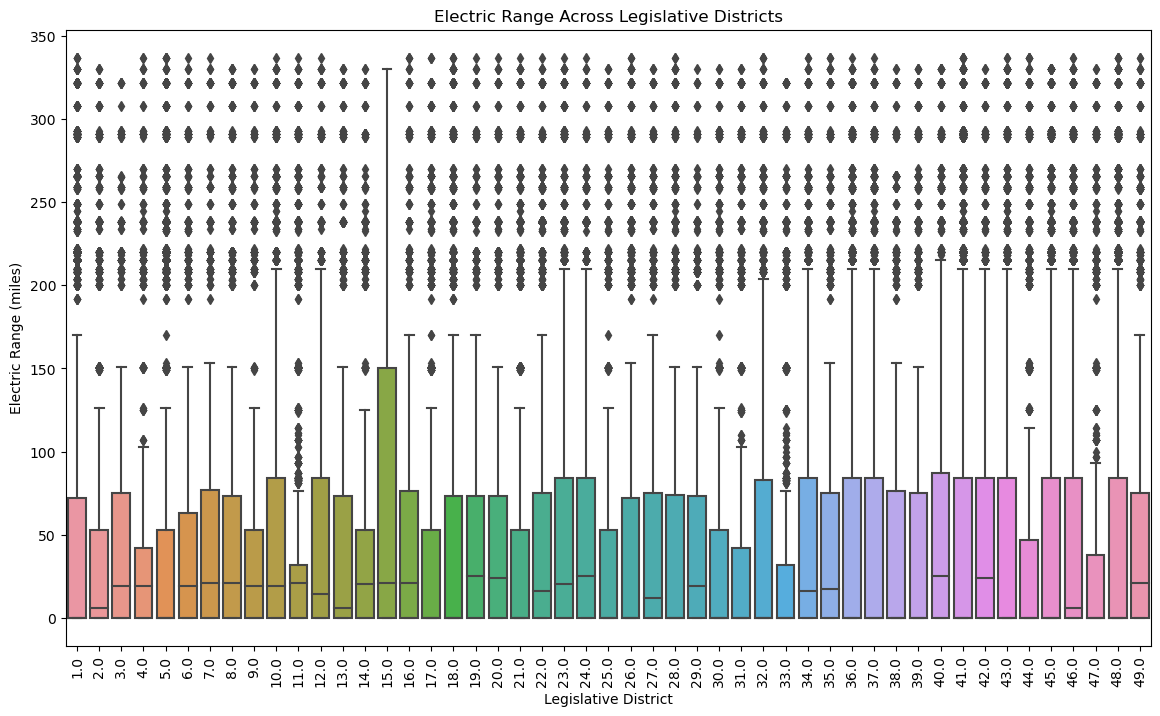

In [43]:
#19
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Legislative District', y='Electric Range')  # Replace 'LegislativeDistrict' with actual column name
plt.title('Electric Range Across Legislative Districts')
plt.xlabel('Legislative District')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=90)
plt.show()

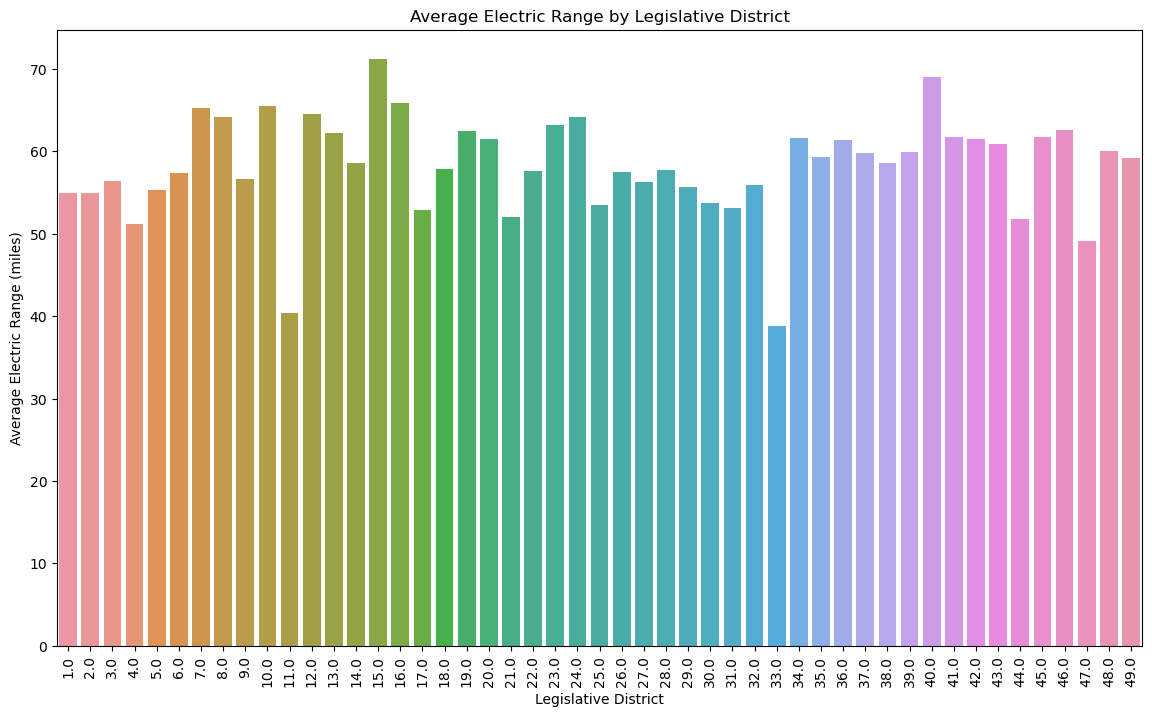

In [44]:
#20
plt.figure(figsize=(14, 8))
mean_ranges_district = df.groupby('Legislative District')['Electric Range'].mean().sort_values(ascending=False)
sns.barplot(x=mean_ranges_district.index, y=mean_ranges_district.values)
plt.title('Average Electric Range by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=90)
plt.show()

In [45]:
mean_ranges_district = df.groupby('Legislative District')['Electric Range'].mean().sort_values(ascending=False)
mean_ranges_district

Legislative District
15.0    71.203057
40.0    69.081416
16.0    65.902113
10.0    65.500649
7.0     65.276995
12.0    64.542654
8.0     64.154095
24.0    64.141509
23.0    63.150179
46.0    62.563883
19.0    62.414725
13.0    62.249404
41.0    61.799949
45.0    61.782299
34.0    61.622839
20.0    61.555623
42.0    61.469453
36.0    61.407550
43.0    60.871544
48.0    60.053484
39.0    59.976426
37.0    59.846791
35.0    59.332414
49.0    59.154003
14.0    58.588537
38.0    58.538633
18.0    57.862523
28.0    57.793952
22.0    57.603192
26.0    57.478104
6.0     57.316035
9.0     56.683482
3.0     56.402453
27.0    56.267633
32.0    55.929198
29.0    55.655116
5.0     55.308446
2.0     54.951231
1.0     54.917162
30.0    53.672245
25.0    53.516163
31.0    53.093523
17.0    52.939602
21.0    51.975893
44.0    51.741221
4.0     51.165669
47.0    49.118875
11.0    40.418245
33.0    38.778463
Name: Electric Range, dtype: float64

# Multivariate

In [46]:
#1. How does the distribution of electric vehicle types vary across different vehicle makes?

# Sample data (you can replace this with your own dataset)
data = {
    'Make': ['Tesla', 'Nissan', 'Chevrolet', 'Toyota', 'BMW', 'Volvo', 'Honda', 'Ford', 'Mercedes-Benz', 'Porsche'],
    'Electric Vehicle Type': ['BEV', 'BEV', 'BEV', 'PHEV', 'PHEV', 'PHEV', 'HEV', 'HEV', 'Electrically Assisted', 
                              'Electrically Assisted']
}


# Group by Vehicle Make and count the number of each Vehicle Type
distribution = df.groupby(['Electric Vehicle Type', 'Make']).size().unstack(fill_value=0)

print(distribution)

Make                                    ALFA ROMEO  AUDI  AZURE DYNAMICS  \
Electric Vehicle Type                                                      
Battery Electric Vehicle (BEV)                   0  2326               8   
Plug-in Hybrid Electric Vehicle (PHEV)          42  1412               0   

Make                                    BENTLEY   BMW  CADILLAC  CHEVROLET  \
Electric Vehicle Type                                                        
Battery Electric Vehicle (BEV)                0  2613       345       9066   
Plug-in Hybrid Electric Vehicle (PHEV)        3  5067        89       4798   

Make                                    CHRYSLER  DODGE  FIAT  ...  RIVIAN  \
Electric Vehicle Type                                          ...           
Battery Electric Vehicle (BEV)                 0      0   783  ...    4425   
Plug-in Hybrid Electric Vehicle (PHEV)      3059    608     0  ...       0   

Make                                    ROLLS ROYCE  SMART  SUBARU  T

In [47]:
#2. Are certain makes more likely to produce battery electric vehicles (BEVs) or plug-in hybrid electric vehicles (PHEVs)
make_vehicle_type = df.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='count')

# Calculate the proportion of BEVs and PHEVs for each make
make_proportions = make_vehicle_type.pivot_table(index='Make', columns='Electric Vehicle Type', values='count', 
                                                 aggfunc='sum').apply(lambda x: x / x.sum())

# Print the results
print(make_proportions)

Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Make                                                    
ALFA ROMEO                                        NaN   
AUDI                                         0.016383   
AZURE DYNAMICS                               0.000056   
BENTLEY                                           NaN   
BMW                                          0.018405   
CADILLAC                                     0.002430   
CHEVROLET                                    0.063857   
CHRYSLER                                          NaN   
DODGE                                             NaN   
FIAT                                         0.005515   
FISKER                                       0.000711   
FORD                                         0.041156   
GENESIS                                      0.001338   
GMC                                          0.000021   
HONDA                                        0.000049   
HYUNDAI                        

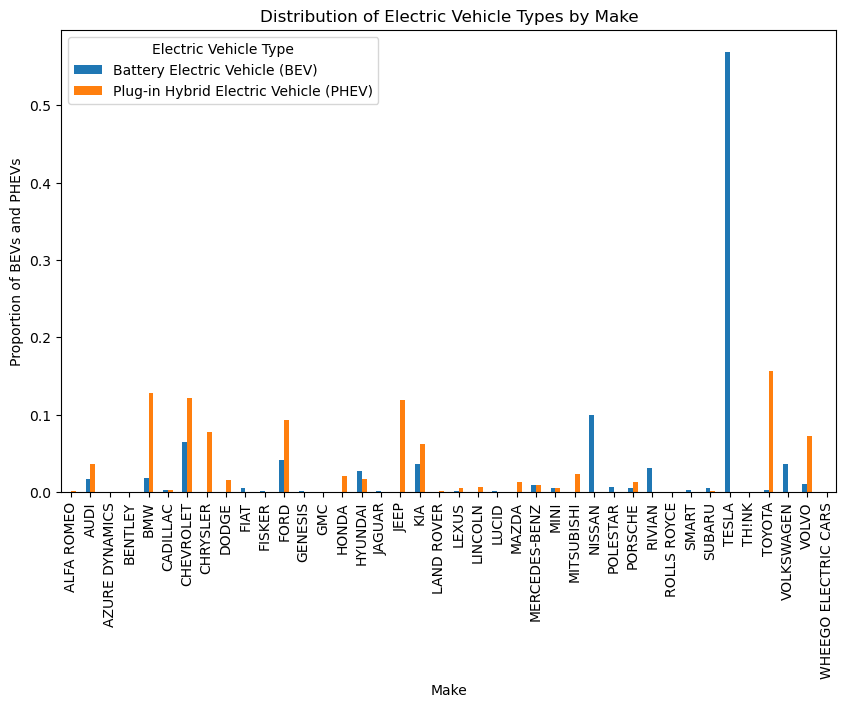

In [48]:
# Plot the results
make_proportions.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Make')
plt.ylabel('Proportion of BEVs and PHEVs')
plt.title('Distribution of Electric Vehicle Types by Make')
plt.show()

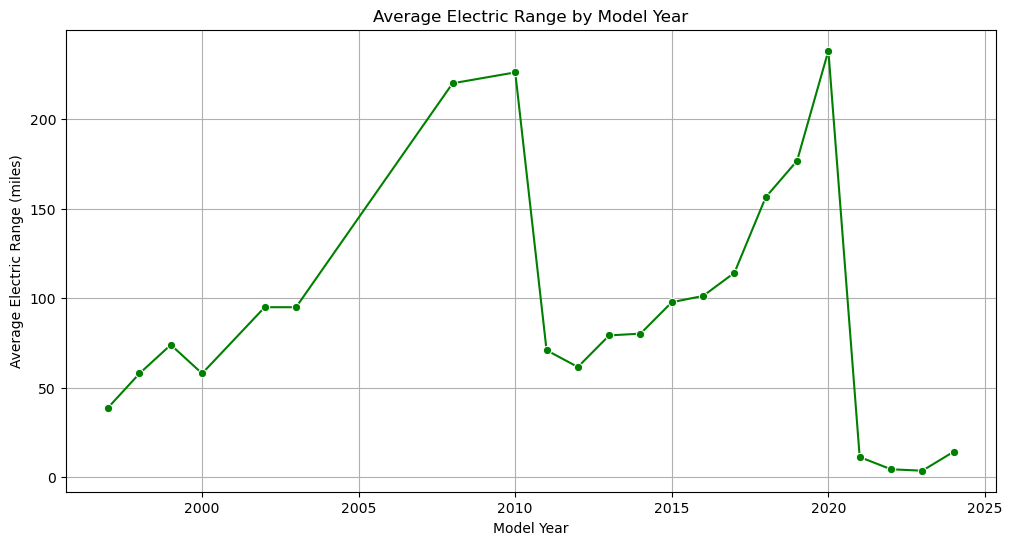

In [49]:
#3. How does the electric range of vehicles change over different model years?
# calculating the average electric range by model year
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

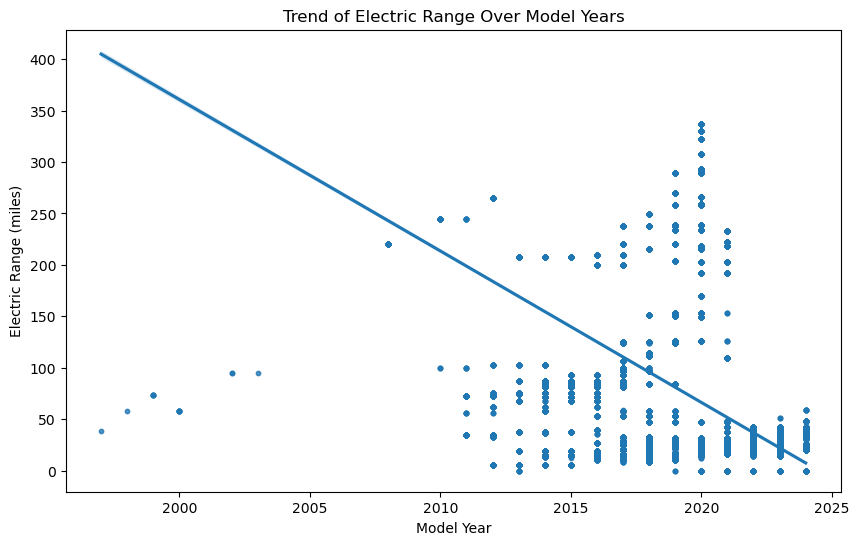

In [50]:
#4. Is there a trend of increasing electric range in newer models?
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Model Year', y='Electric Range', scatter_kws={'s':10})
plt.title('Trend of Electric Range Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

In [51]:
#5 Is there a difference in base MSRP between battery electric vehicles (BEVs) and plug-in hybrid electric vehicles
#(PHEVs)?
# Filter the dataset to include only BEVs and PHEVs
bevs = df[df['Electric Vehicle Type'] == 'BEV']
phevs = df[df['Electric Vehicle Type'] == 'PHEV']

# Calculate the average base MSRP for BEVs and PHEVs
avg_msrp_bevs = bevs['Base MSRP'].mean()
avg_msrp_phevs = phevs['Base MSRP'].mean()

# Calculate the difference in average base MSRP between BEVs and PHEVs
msrp_diff = avg_msrp_bevs - avg_msrp_phevs

print(f'The average base MSRP for BEVs is ${avg_msrp_bevs:.2f}')
print(f'The average base MSRP for PHEVs is $ ${msrp_diff:.2f}')

The average base MSRP for BEVs is $nan
The average base MSRP for PHEVs is $ $nan


In [52]:
#6. Are BEVs typically more expensive than PHEVs?
 
# Filter the dataset to include only BEVs and PHEVs
bevs = df[df['Electric Vehicle Type'] == 'BEV']
phevs = df[df['Electric Vehicle Type'] == 'PHEV']

# Calculate the average base MSRP for BEVs and PHEVs
avg_msrp_bevs = bevs['Base MSRP'].mean()
avg_msrp_phevs = phevs['Base MSRP'].mean()

# Compare the average base MSRP of BEVs and PHEVs
if avg_msrp_bevs > avg_msrp_phevs:
    print('BEVs are typically more expensive than PHEVs.')
elif avg_msrp_bevs < avg_msrp_phevs:
    print('PHEVs are typically more expensive than BEVs.')
else:
    print('BEVs and PHEVs have the same average base MSRP.')

BEVs and PHEVs have the same average base MSRP.


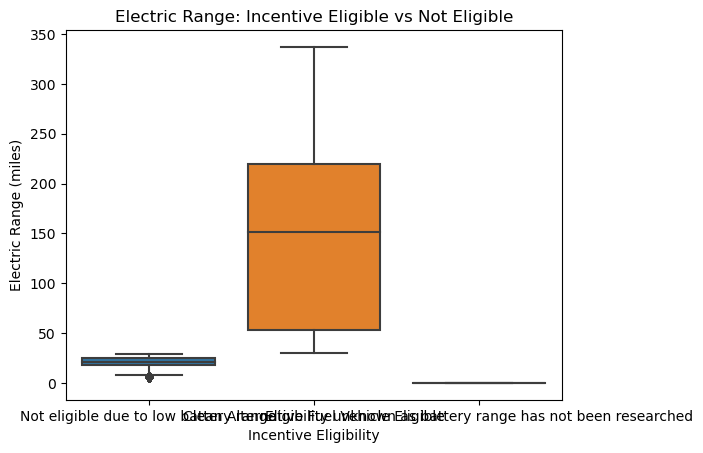

In [53]:
#7. How does the electric range vary between vehicles that are eligible for clean alternative fuel vehicle incentives and those
#that are not?

sns.boxplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range')
plt.title('Electric Range: Incentive Eligible vs Not Eligible')
plt.xlabel('Incentive Eligibility')
plt.ylabel('Electric Range (miles)')
plt.show()


In [54]:
#8  Are eligible vehicles likely to have longer electric ranges?
# Checking the average electric range based on incentive eligibility
eligible_mean_range = df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].mean()
print(eligible_mean_range)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         151.037790
Eligibility unknown as battery range has not been researched      0.000000
Not eligible due to low battery range                            20.157192
Name: Electric Range, dtype: float64


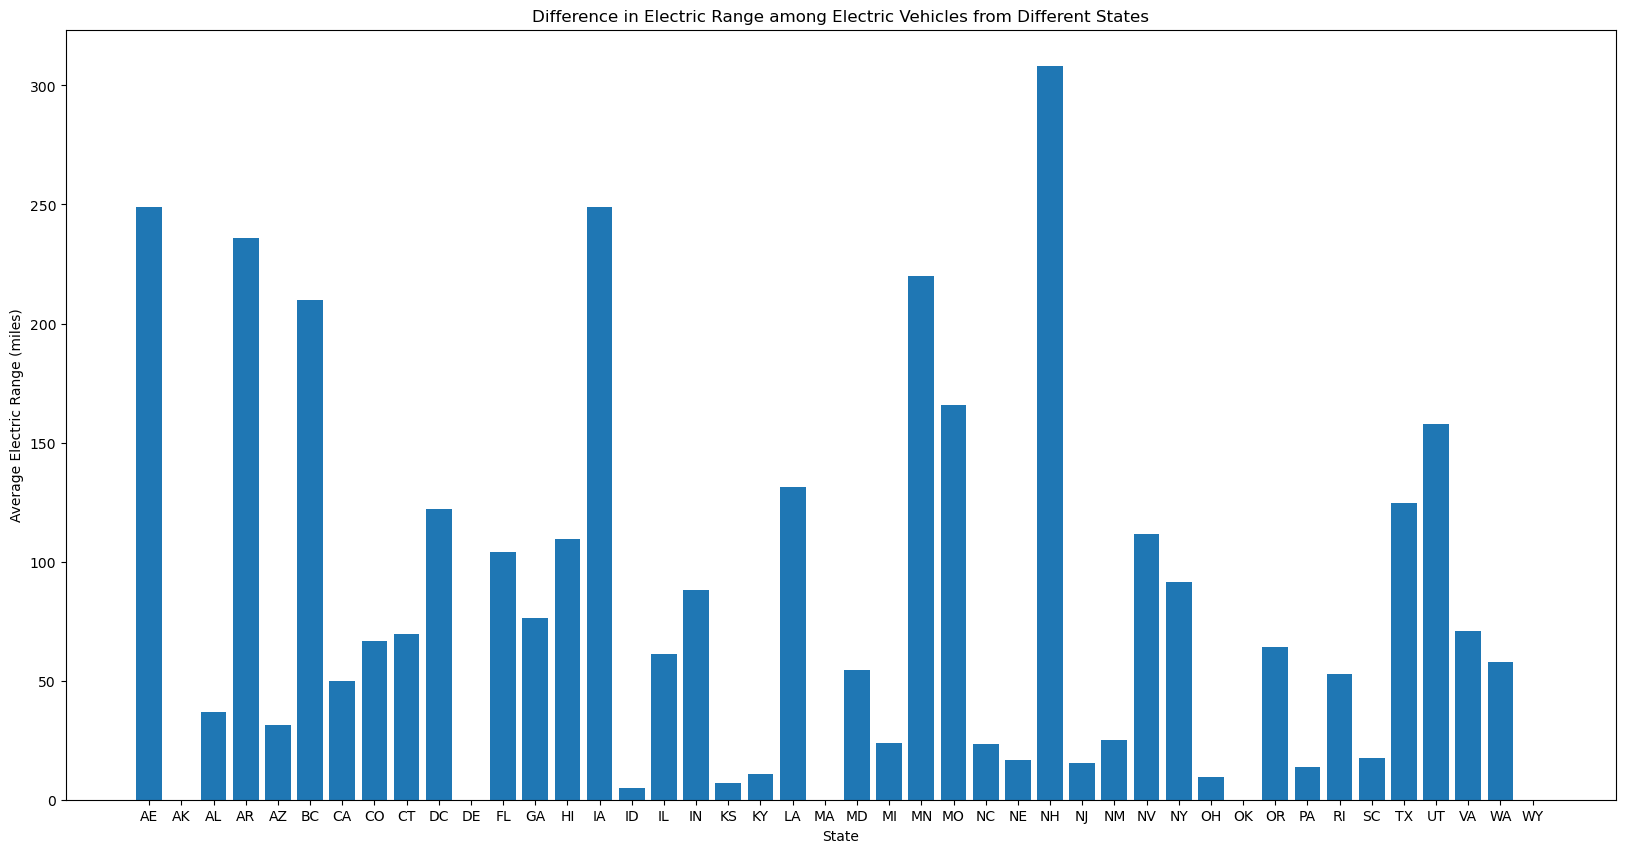

In [55]:
#9 Is there a difference in electric range among electric vehicles from different states?


# Group the data by state and calculate the average electric range
state_ranges = df.groupby('State')['Electric Range'].mean()

# Plot the data
plt.figure(figsize=(20,10))
plt.bar(state_ranges.index, state_ranges.values)
plt.xlabel('State')
plt.ylabel('Average Electric Range (miles)')
plt.title('Difference in Electric Range among Electric Vehicles from Different States')
plt.show()

In [56]:
#10 Are electric vehicles in certain states more likely to have longer electric ranges?

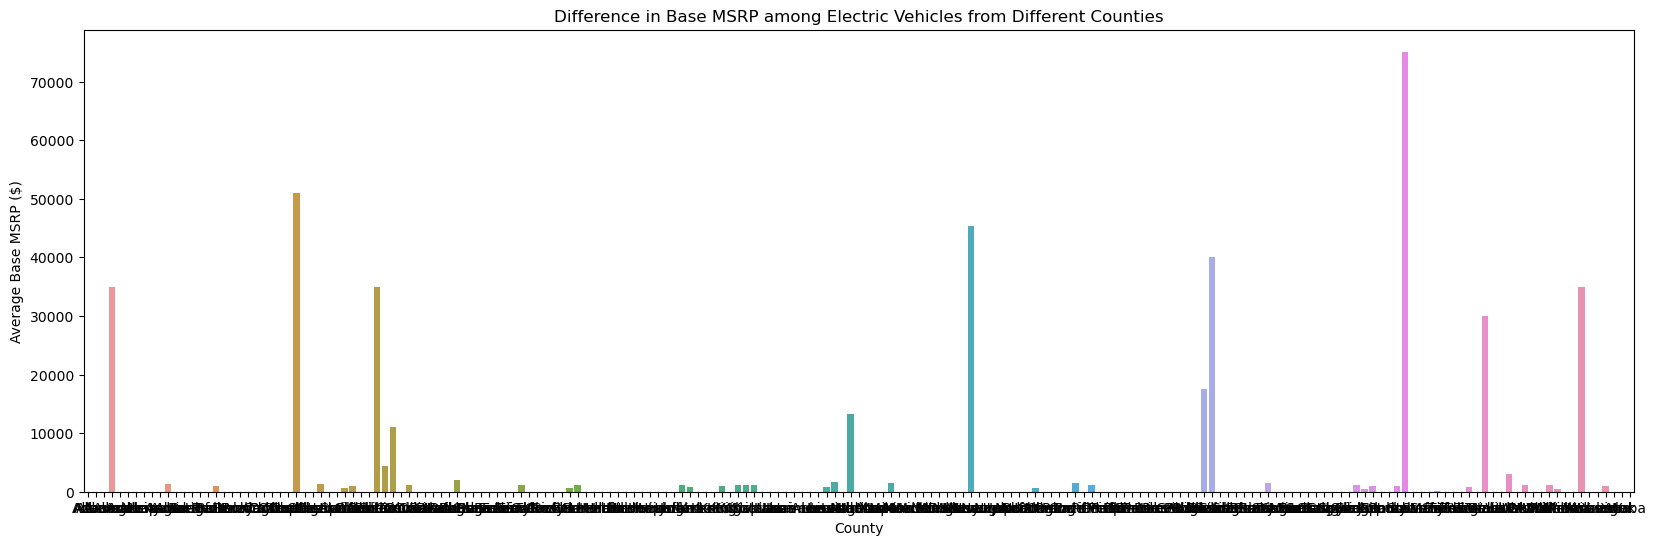

In [57]:
#11. How does base MSRP vary across different counties?


# Group the data by county and calculate the average base MSRP
county_mspr = df.groupby('County')['Base MSRP'].mean()

# Plot the data
plt.figure(figsize=(20, 6))
sns.barplot(x=county_mspr.index, y=county_mspr.values)
plt.xlabel('County')
plt.ylabel('Average Base MSRP ($)')
plt.title('Difference in Base MSRP among Electric Vehicles from Different Counties')
plt.show()

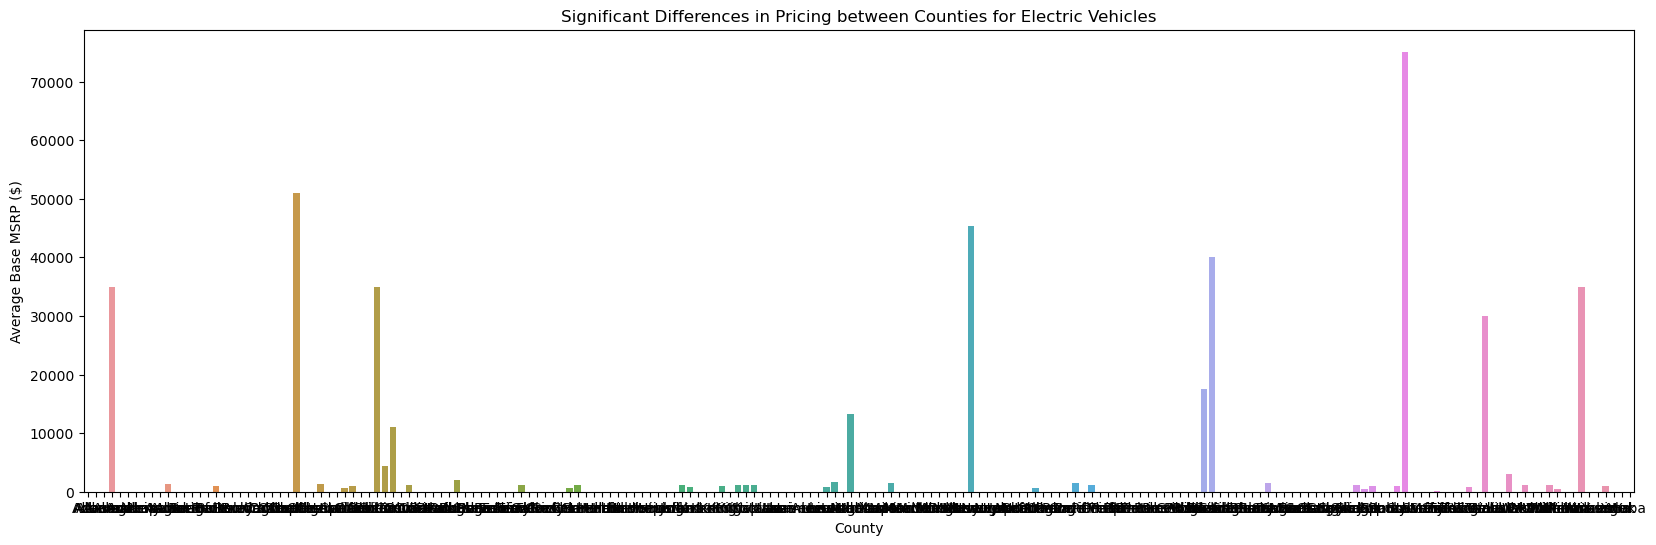

In [58]:
#12

# Group the data by county and calculate the average base MSRP
county_pricing = df.groupby('County')['Base MSRP'].mean()

# Plot the data
plt.figure(figsize=(20, 6))
sns.barplot(x=county_pricing.index, y=county_pricing.values)
plt.xlabel('County')
plt.ylabel('Average Base MSRP ($)')
plt.title('Significant Differences in Pricing between Counties for Electric Vehicles')
plt.show()

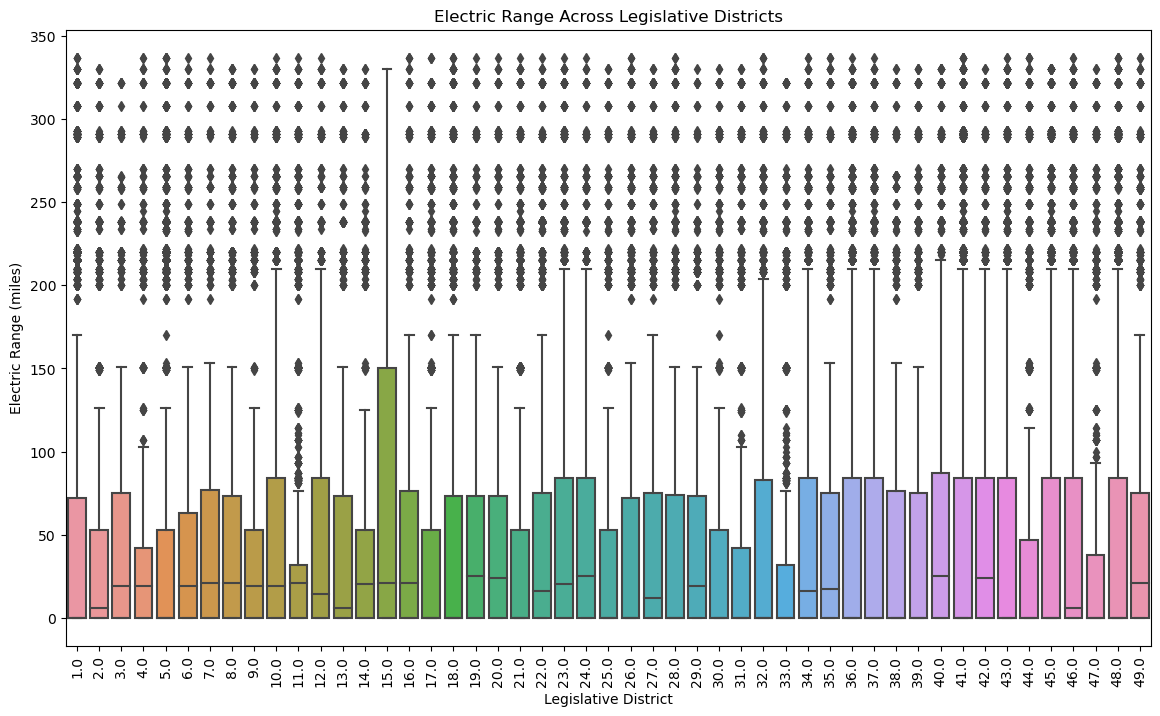

In [59]:
#13. Is there any correlation between the electric range of vehicles and the legislative district they belong to?
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Legislative District', y='Electric Range')  # Replace 'LegislativeDistrict' with actual column name
plt.title('Electric Range Across Legislative Districts')
plt.xlabel('Legislative District')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=90)
plt.show()

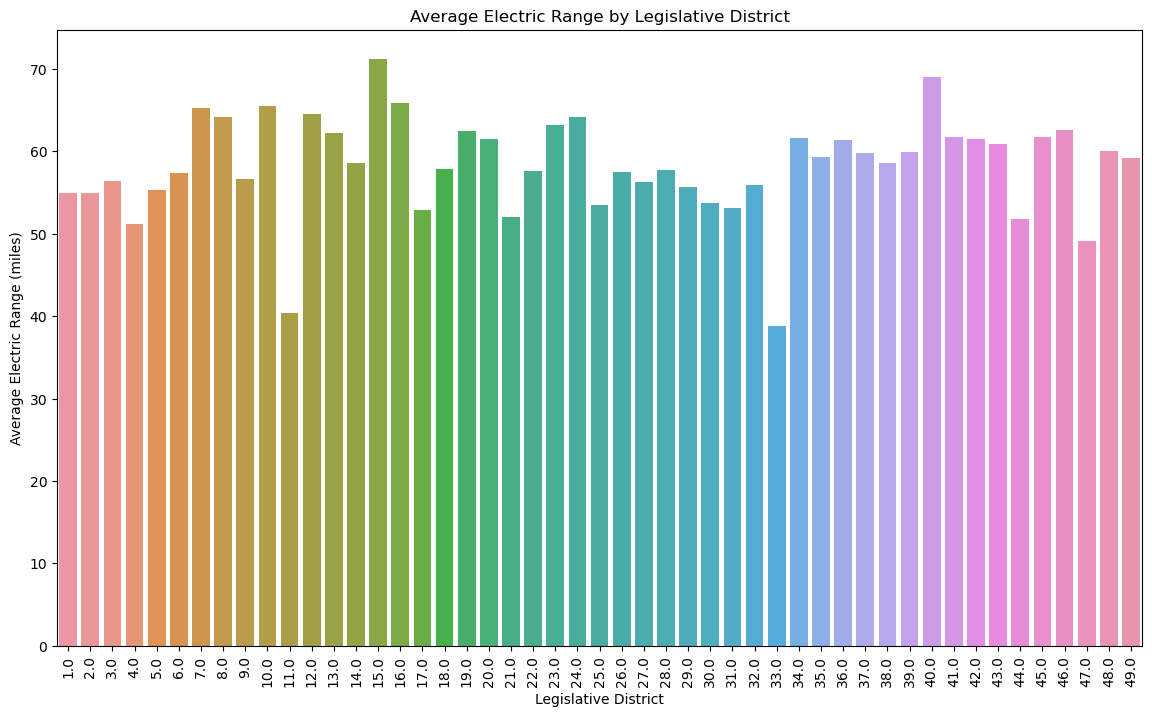

In [60]:
#14

plt.figure(figsize=(14, 8))
mean_ranges_district = df.groupby('Legislative District')['Electric Range'].mean().sort_values(ascending=False)  # Replace 'LegislativeDistrict' with actual column name
sns.barplot(x=mean_ranges_district.index, y=mean_ranges_district.values)
plt.title('Average Electric Range by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=90)
plt.show()

In [61]:
#15. How does the electric range of vehicles vary based on the electric utility company?


# Group the data by utility company
grouped = df.groupby('Electric Utility')

# Calculate the average electric range for each utility company
avg_range_by_utility = grouped['Electric Range'].mean()

# Print the result
print(avg_range_by_utility)

Electric Utility
AVISTA CORP                                                                   52.713936
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC     54.851064
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY    55.814476
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||PUD NO 1 OF ASOTIN COUNTY       53.630137
BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN                   23.000000
                                                                                ...    
PUD NO 1 OF WHATCOM COUNTY                                                    69.097561
PUD NO 2 OF GRANT COUNTY                                                      59.945299
PUGET SOUND ENERGY INC                                                        56.143196
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                 55.712638
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                            63.378484
Name: Electric 

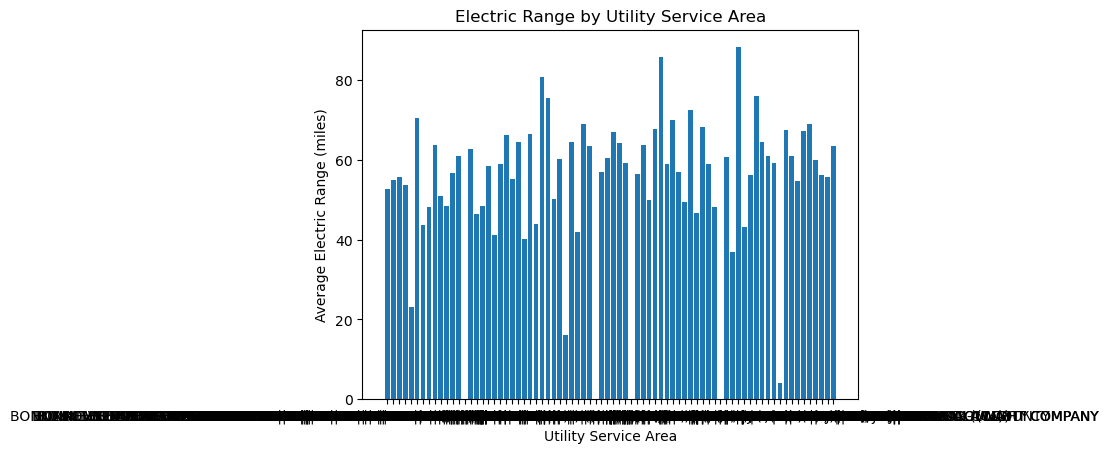

In [62]:
#16. Are there any differences in electric range depending on the utility service area?

grouped = df.groupby('Electric Utility')

# Calculate the average electric range for each utility service area
avg_range_by_utility = grouped['Electric Range'].mean()

# Plot the results
plt.bar(avg_range_by_utility.index, avg_range_by_utility.values)
plt.xlabel('Utility Service Area')
plt.ylabel('Average Electric Range (miles)')
plt.title('Electric Range by Utility Service Area')
plt.show()

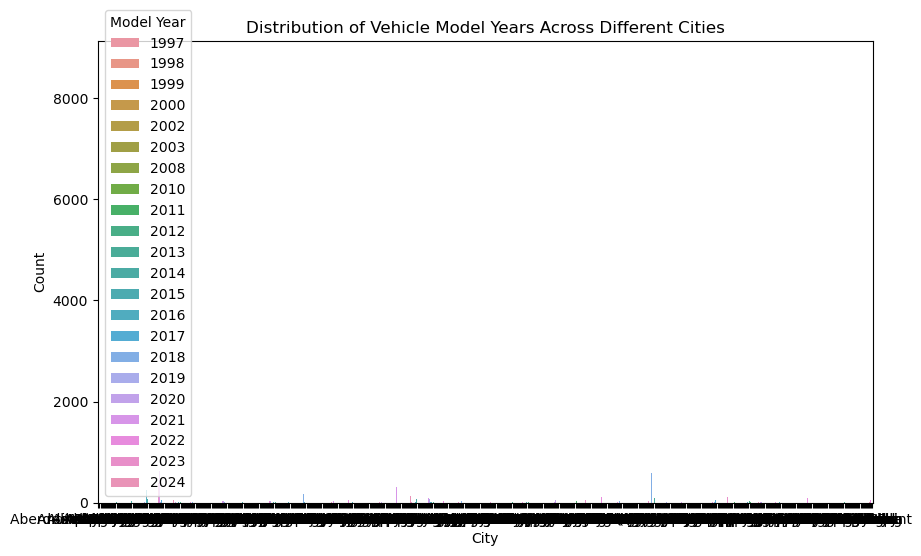

In [63]:
#17. How are vehicle model years distributed across different cities?

# Group the data by city and model year
grouped = df.groupby(['City', 'Model Year']).size().reset_index(name='count')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='count', hue='Model Year', data=grouped)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Model Years Across Different Cities')
plt.show()

In [64]:
#18

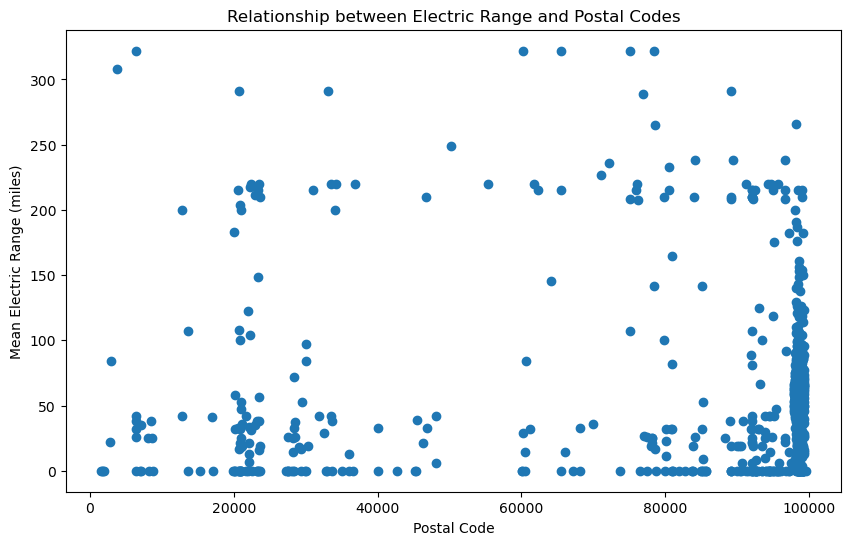

In [65]:
#19 Is there any relationship between the electric range of vehicles and their postal codes?

# Group the data by postal code and calculate the mean electric range
grouped = df.groupby('Postal Code')['Electric Range'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(grouped['Postal Code'], grouped['Electric Range'])
plt.xlabel('Postal Code')
plt.ylabel('Mean Electric Range (miles)')
plt.title('Relationship between Electric Range and Postal Codes')
plt.show()

In [66]:
#20. Are there any clusters of vehicles with particularly long or short electric ranges in specific areas?

In [67]:
#Q B. Consider below as Features and target column for the provided dataset:
#Features: County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Electric Range, Base MSRP, 
#Legislative
#District, Vehicle Location, Electric Utility, 2020 Census Tract Target Variable: Clean Alternative Fuel Vehicle (CAFV) 
#Eligibility

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [69]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [70]:
le=LabelEncoder()
df["Electric Vehicle Type"]=le.fit_transform(df["Electric Vehicle Type"])
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=le.fit_transform(df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])

In [71]:
df.drop(["VIN (1-10)","City"],axis=1,inplace=True)
df

,County,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,King,WA,98126.0,2017,AUDI,A3,1,2,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,Thurston,WA,98502.0,2018,AUDI,A3,1,2,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,Thurston,WA,98516.0,2017,TESLA,MODEL S,0,0,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,Thurston,WA,98589.0,2021,JEEP,WRANGLER,1,2,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,Yakima,WA,98902.0,2020,TESLA,MODEL 3,0,0,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,Douglas,WA,98802.0,2023,LUCID,AIR,0,1,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,Spokane,WA,99206.0,2022,JEEP,WRANGLER,1,2,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,King,WA,98022.0,2021,TESLA,MODEL 3,0,1,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,Clark,WA,98682.0,2020,TESLA,MODEL 3,0,0,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [72]:
x=df.drop("Electric Vehicle Type",axis=1)
y=df["Electric Vehicle Type"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.700,random_state=100)
scaler = StandardScaler()

<Axes: >

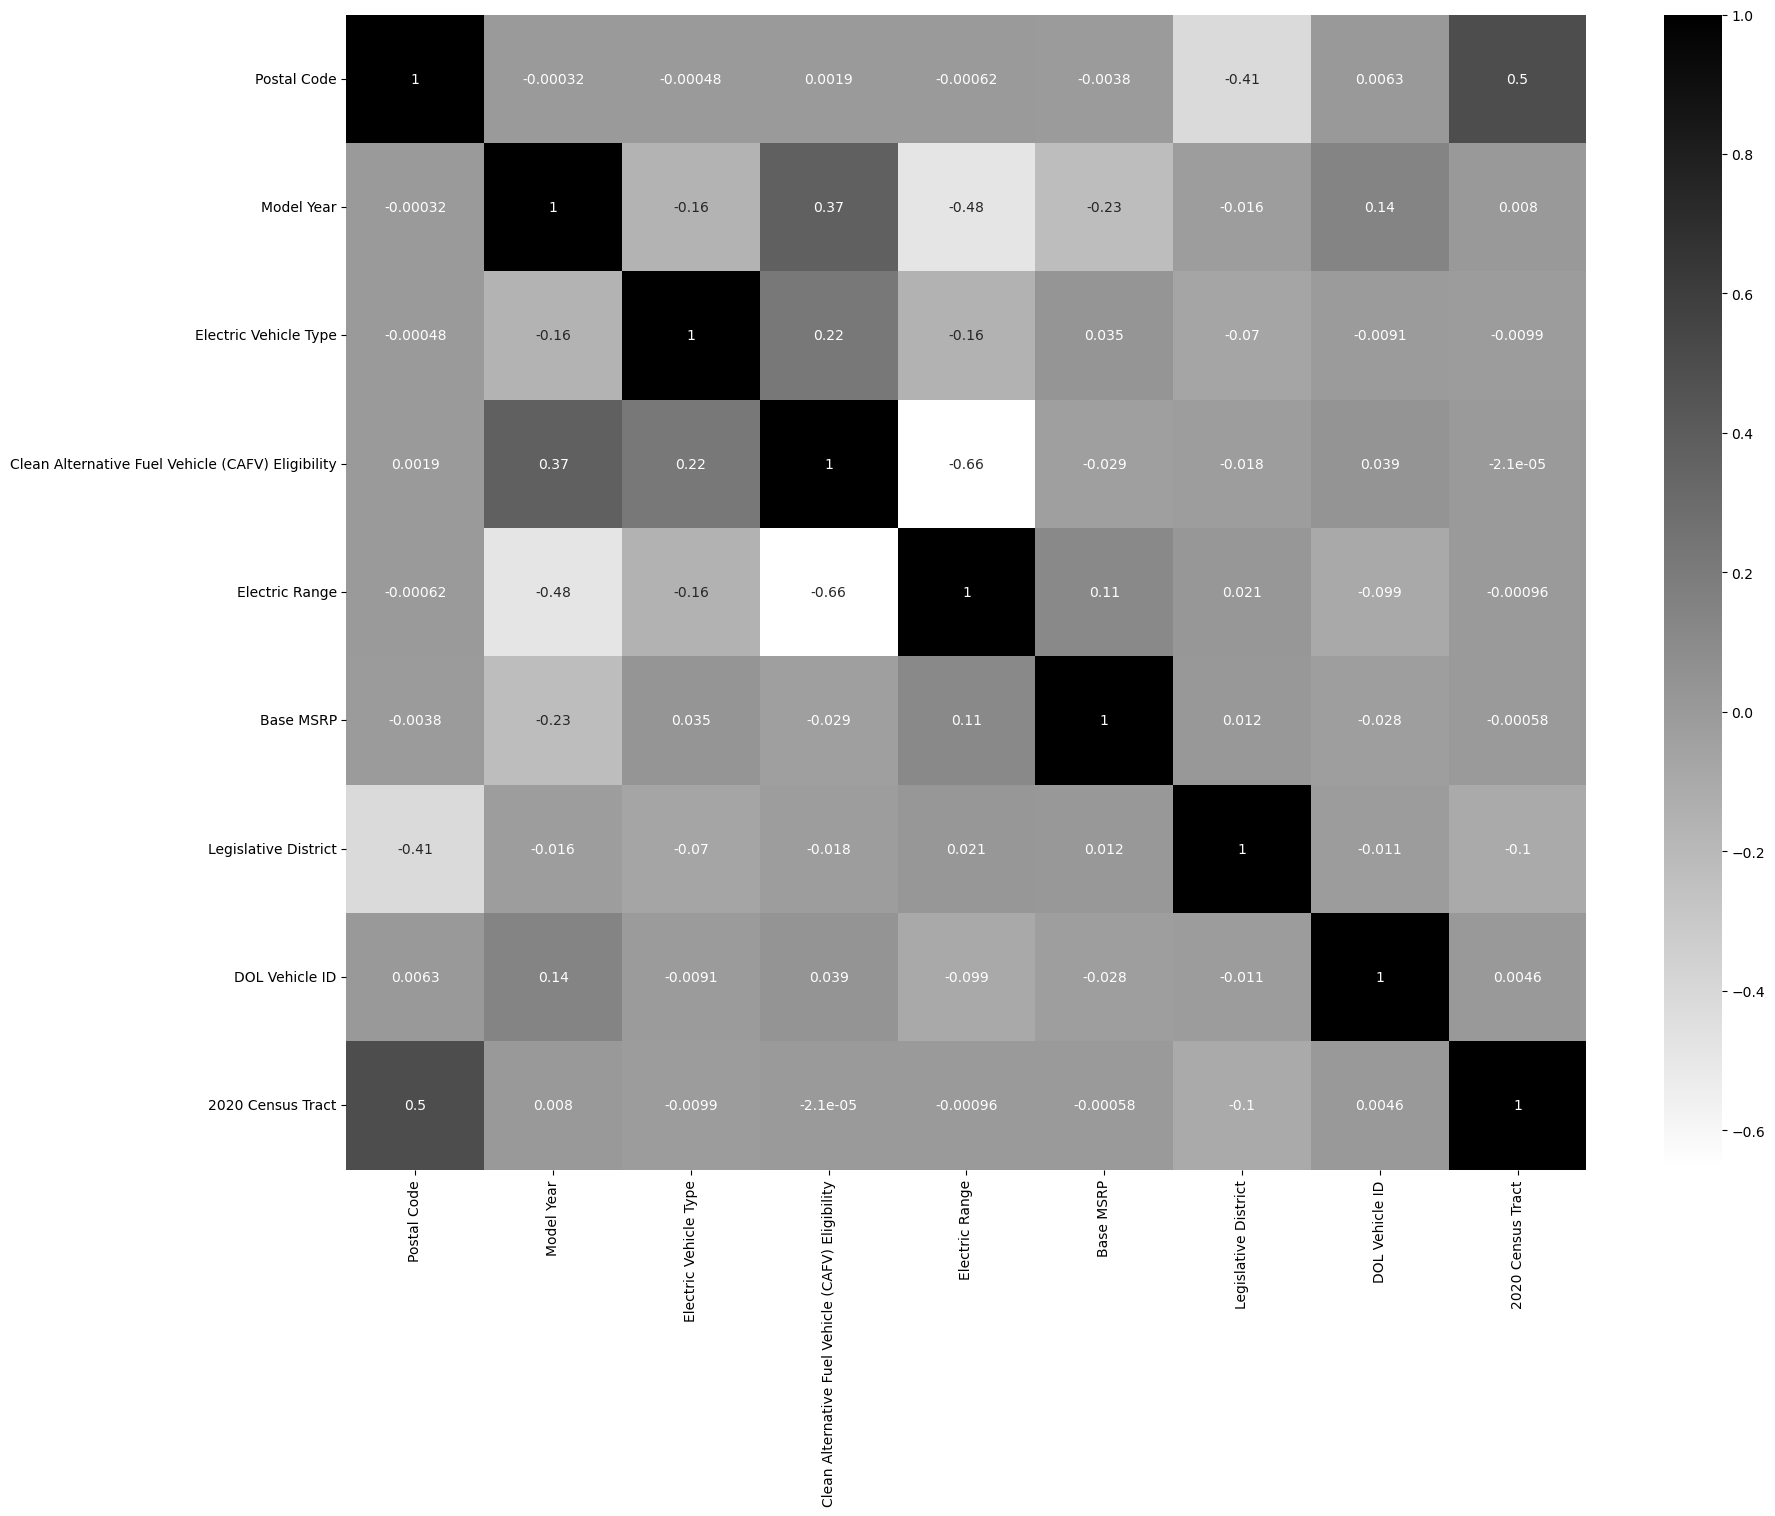

In [73]:
#Train Test Split
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="gray_r")

In [79]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

ValueError: could not convert string to float: 'Whitman'

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
# 9 Model Building - Electric Vehicle Type

In [ ]:
#logistic regression

In [ ]:
reg=LogisticRegression()

In [ ]:
reg.fit(x_train,y_train)

In [ ]:
reg.fit(x_train,y_train)

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
y_pred=reg.predict(x_test)